In [2]:
import os
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
#from mpl_toolkits.mplot3d import Axes3D

In [3]:
from IPython.display import clear_output

#facemap 
https://github.com/tensorflow/tfjs-models/blob/838611c02f51159afdd77469ce67f0e26b7bbb23/face-landmarks-detection/src/mediapipe-facemesh/keypoints.ts

In [2]:
#%matplotlib notebook

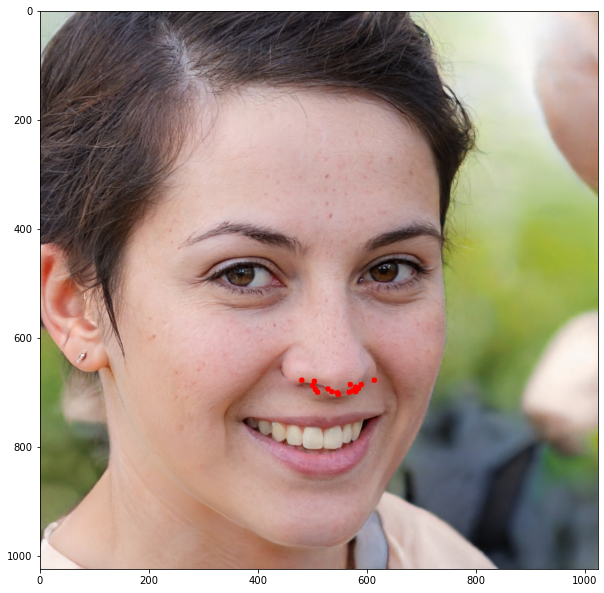

'\nfor facial_landmarks in result.multi_face_landmarks:\n    for i in range(0, 468):\n        landmrk = facial_landmarks.landmark[i]\n        locx = int(landmrk.x * width)\n        locy = int(landmrk.y * height)\n        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)\n        #cv2.circle(frame, (locx, locy), 1, (0, 200, 0), 0)\n        #cv2.imshow("Image", frame)\n'

In [19]:
img_base = cv2.imread(os.path.abspath("data/image.jpg"))
#img_base=plt.imread(os.path.abspath("data/faced.jpg"))
img = img_base.copy()
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
result = face_mesh.process(img)


height, width, _ = img.shape
facial_landmarks = result.multi_face_landmarks[0]

#selected_landmark = [1,2,98,327]
selected_landmark = [1, 2, 327, 166, 79,60, 20, 99, 242, 97, 141, 2, 370, 326, 462, 328, 250, 290]

for i in selected_landmark :
    landmrk = facial_landmarks.landmark[i]
    locx = int(landmrk.x * width)
    locy = int(landmrk.y * height)
    
    #pixel information can be extracted from here.
    #print("Location X = {}, Y = {}".format(locx,locy))
    
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.circle(img, (locx, locy), 5, (0, 0, 255), -1)
    #cv2.imshow("Image", frame)

fig = plt.figure(figsize=(10,15))
plt.imshow(img[:,:,::-1])
plt.show()

'''
for facial_landmarks in result.multi_face_landmarks:
    for i in range(0, 468):
        landmrk = facial_landmarks.landmark[i]
        locx = int(landmrk.x * width)
        locy = int(landmrk.y * height)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #cv2.circle(frame, (locx, locy), 1, (0, 200, 0), 0)
        #cv2.imshow("Image", frame)
'''

In [33]:
facial_landmarks.landmark[45]

x: 0.5326217
y: 0.64110947
z: -0.1534377

In [28]:
selected_landmark[:]

[1, 2, 327, 166, 79, 60, 20, 99, 242, 97, 141, 2, 370, 326, 462, 328, 250, 290]

In [2]:
#basic of video streaming in cv2
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(os.path.abspath("data/video1.mov"))

while True:

    ret, frame = cap.read()

    if ret == True:

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow('frame',frame)


        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    else:
        break
cap.release()
cv2.destroyAllWindows()


In [35]:
#realtime mesh detection
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False) #meant for video feed
video = cv2.VideoCapture(os.path.abspath("data/video1.mp4"))

selected_landmark = [1, 2, 327, 166, 79,60, 20, 99, 242, 97, 141, 2, 370, 326, 462, 328, 250, 290]

while True:
    ret, frame = video.read()
    # resizing the frame for better view
    frame = cv2.resize(frame, (800, 600))
    #frame.flags.writeable = False
    result = face_mesh.process(frame)
    height, width, _ = frame.shape
    
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    try:
        for facial_landmarks in result.multi_face_landmarks:
            for i in selected_landmark:
                landmrk = facial_landmarks.landmark[i]
                locx = int(landmrk.x * width)
                locy = int(landmrk.y * height)
                
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                cv2.circle(frame, (locx, locy), 1, (0, 200, 0), 0)
                cv2.imshow('frame',frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
    except Exception as e:
        print(e)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

video.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [6]:
'''
img = img_base.copy()

for source_idx, target_idx in mp_face_mesh.FACEMESH_FACE_OVAL:
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img.shape[1]), int(source.y * img.shape[0]))
    relative_target = (int(target.x * img.shape[1]), int(target.y * img.shape[0]))
    
    cv2.line(img, relative_source, relative_target, color=(255,255,255), thickness=2)
'''

'\nimg = img_base.copy()\n\nfor source_idx, target_idx in mp_face_mesh.FACEMESH_FACE_OVAL:\n    source = landmarks.landmark[source_idx]\n    target = landmarks.landmark[target_idx]\n    \n    relative_source = (int(source.x * img.shape[1]), int(source.y * img.shape[0]))\n    relative_target = (int(target.x * img.shape[1]), int(target.y * img.shape[0]))\n    \n    cv2.line(img, relative_source, relative_target, color=(255,255,255), thickness=2)\n'

In [5]:
'''
fig = plt.figure(figsize=(10,15))
plt.imshow(img[:,:,::-1])
plt.show()
'''

'\nfig = plt.figure(figsize=(10,15))\nplt.imshow(img[:,:,::-1])\nplt.show()\n'

## Video Feed

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False) #meant for video feed

video=cv2.VideoCapture(0)
 
while True:
    check,frame=video.read()
    result = face_mesh.process(frame)
    height, width, _ = frame.shape
    try:
        for facial_landmarks in result.multi_face_landmarks:
            for i in range(0, 468):
                landmrk = facial_landmarks.landmark[i]
                locx = int(landmrk.x * width)
                locy = int(landmrk.y * height)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                cv2.circle(frame, (locx, locy), 1, (0, 200, 0), 0)
                cv2.imshow("Image", frame)
    except:
        cv2.imshow("Image", frame)
        key=cv2.waitKey(1)
        if key==ord('q'):
            break;
            
video.release()
cv2.destroyAllWindows()